In [2]:
import pandas as pd

sensor_data = "../all respondents data/002_a2da21a1-4fbb-43db-a269-709b7b376275.csv"
cognitive_phase_data = "002-cognitive task.csv"

df_sensor = pd.read_csv(sensor_data, low_memory=False)
df_phases = pd.read_csv(cognitive_phase_data)

df_sensor.head()
df_phases.head()

# print(df_sensor['Timestamp'].dtype)
# print(df_phases['Time Started'].dtype)



,Time Started,Cognitive Task,Screens
0,0:00:05,Task Understanding,Supporting Material
1,0:01:49,NaN,NaN
2,0:02:42,Explore,Map
3,0:03:35,Set Goal,Filter
4,0:03:57,Test Hypothesis,Filter


In [3]:
import datetime

# Define a function to convert a time string to milliseconds
def time_to_ms(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S').time()  # Parse time string to time object
    delta_obj = datetime.timedelta(hours=time_obj.hour, minutes=time_obj.minute, seconds=time_obj.second)  # Create timedelta object
    ms = delta_obj.total_seconds() * 1000  # Convert to milliseconds
    return ms

# Convert the 'Time Started' column to milliseconds
df_phases['Time Started'] = df_phases['Time Started'].apply(time_to_ms)

# Print the resulting DataFrame
print(df_phases)
print(df_phases['Time Started'].dtype)


    Time Started      Cognitive Task              Screens
0         5000.0  Task Understanding  Supporting Material
1       109000.0                 NaN                  NaN
2       162000.0             Explore                  Map
3       215000.0            Set Goal               Filter
4       237000.0     Test Hypothesis               Filter
..           ...                 ...                  ...
95     2270000.0            Conclude                  NaN
96     2283000.0       Asses Results         Filtered Map
97     2322000.0       Asses Results           Statistics
98     2352000.0            Conclude                  NaN
99     2404000.0                 NaN                  NaN

[100 rows x 3 columns]
float64


In [4]:
merged_df = pd.merge_asof(df_sensor, df_phases, left_on='Timestamp', right_on='Time Started')
final_df = merged_df[['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion','Cognitive Task', 'Screens']]
final_df.head()


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
0,36522.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task Understanding,Supporting Material
1,36540.0,0.124517,0.182482,0.023478,0.127476,0.027181,0.125768,0.056677,0.328766,0.0,0.290252,0.007409,Task Understanding,Supporting Material
2,36540.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Task Understanding,Supporting Material
3,36591.0,0.124995,0.184449,0.023551,0.126825,0.026971,0.126182,0.056253,0.328766,0.0,0.382996,0.016253,Task Understanding,Supporting Material
4,36626.0,0.125877,0.187244,0.023729,0.127308,0.026426,0.126763,0.056174,0.328766,0.0,0.414892,0.017531,Task Understanding,Supporting Material


In [5]:
#Remove rows with empty emotions data
final_df = final_df.dropna(subset=['Contempt'])

# Check if a categorical value exists in the DataFrame
if final_df['Cognitive Task'].isin(['Explore']).any():
    print('The categorical value exists in the DataFrame')
else:
    print('The categorical value does not exist in the DataFrame')

final_df.to_csv('003-91dc3428_emotions_with_cognitive_task_and_screen_new.csv', index=False)
final_df.tail()

The categorical value exists in the DataFrame


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
146223,2477397.0,0.159918,0.199071,0.036735,0.199124,0.024523,0.121992,0.072197,0.328766,0.0,0.269123,0.008675,NaN,NaN
146225,2477428.0,0.152546,0.203217,0.033635,0.181088,0.024471,0.124029,0.068194,0.328766,0.0,0.226632,0.009204,NaN,NaN
146227,2477460.0,0.145856,0.203593,0.031161,0.169411,0.024488,0.125848,0.066089,0.328766,0.0,0.226944,0.009375,NaN,NaN
146229,2477491.0,0.140343,0.205834,0.029277,0.161164,0.024488,0.126543,0.064886,0.328766,0.0,0.210516,0.009474,NaN,NaN
146231,2477523.0,0.135568,0.210283,0.027627,0.153636,0.024495,0.127775,0.063522,0.328766,0.0,0.200138,0.009230,NaN,NaN


In [6]:
display(final_df.sample(15))

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
11695,231738.0,0.179929,0.002759,0.112484,0.232489,24.097345,0.024987,1.923747,89.944664,59.287807,0.013173,0.003430,Set Goal,Filter
104549,1781704.0,0.211999,0.185831,0.050594,0.210211,0.026658,0.132304,0.086842,0.445851,0.000000,0.003774,0.003774,Conclude,NaN
45987,804870.0,1.207182,0.216651,0.509418,0.978808,0.024601,0.125033,0.098580,49.973122,0.000000,0.015666,0.009192,Test Hypothesis,Filter
26445,477978.0,0.045100,0.000142,0.020547,0.086184,99.909653,0.026106,1.200716,99.962662,96.161179,0.052679,0.052679,Generate Hypothesis,Map
13707,265280.0,6.861239,0.151369,0.650916,10.035293,0.025567,0.114868,13.636853,79.778549,0.000000,0.565387,0.351112,Explore,Supporting Material
41133,723958.0,0.247897,0.176978,0.046955,0.245591,0.029869,0.126898,0.090214,0.409131,0.000000,1.547761,0.002455,Asses Results,Statistics
28967,520011.0,1.862114,0.154888,0.609763,2.863810,0.024418,0.142108,0.679933,77.516258,0.000000,0.029938,0.048068,Test Hypothesis,Filter
124855,2120485.0,3.962349,0.186138,0.671874,3.542488,0.024496,0.130940,10.898330,65.646980,0.000000,0.066763,0.240462,Asses Results,Filtered Map
73861,1270074.0,1.455737,0.472583,0.677438,1.032641,0.030404,0.145498,3.694463,69.936737,0.000000,0.418627,1.405926,Create Artifact,Save Filter
47943,837482.0,0.139285,0.190399,0.027092,0.142392,0.024479,0.127151,0.058215,0.328766,0.000000,0.012470,0.004473,Explore,Supporting Material


In [7]:
display(final_df.describe())

,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion
count,7.311900e+04,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000,73119.000000
mean,1.257174e+06,2.012766,0.558066,0.342764,2.636521,1.087325,0.135048,3.317782,35.567201,1.156507,0.339462,0.134676
std,7.045893e+05,4.519206,3.920136,0.555571,6.807691,10.005670,0.249280,9.813093,34.816160,10.095268,0.868025,0.732617
min,3.654000e+04,0.003705,0.000021,0.006188,0.041279,0.024042,0.005518,0.055338,0.328766,-45.083767,0.000320,0.000166
25%,6.467795e+05,0.168212,0.170994,0.026189,0.180939,0.024327,0.121300,0.080309,0.328766,0.000000,0.027586,0.011523
50%,1.257611e+06,0.998678,0.186814,0.238133,0.947007,0.024843,0.126304,0.311725,28.883924,0.000000,0.081228,0.030473
75%,1.867240e+06,1.438978,0.193553,0.648991,1.547494,0.026452,0.128724,2.570031,67.226921,0.000000,0.276837,0.081493
max,2.477523e+06,93.730980,91.378159,63.556683,99.461021,99.979492,10.356455,99.971573,99.981049,99.871223,42.219398,44.869358


In [8]:
# Create medians df
medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).median()
# Reset index and add 'Cognitive Task' as a column
medians = medians.reset_index()
medians['Cognitive Task'] = medians['Cognitive Task']

# Print the medians dataframe
print(medians)
medians.head()

        Cognitive Task     Anger  Contempt   Disgust      Fear       Joy  \
0        Asses Results  1.178430  0.186407  0.503864  0.998175  0.024717   
1             Conclude  0.476468  0.188482  0.034843  0.513223  0.024523   
2      Create Artifact  1.236010  0.185843  0.573569  1.097246  0.024624   
3              Explore  1.034160  0.186364  0.266363  0.992024  0.025058   
4  Generate Hypothesis  1.275295  0.181139  0.655613  1.120867  0.024716   
5       Interpert Data  1.345128  0.177853  0.663264  1.077942  0.026045   
6          Refine Goal  0.706748  0.187624  0.084525  0.755376  0.024795   
7             Set Goal  0.203772  0.185298  0.035827  0.253336  0.027946   
8   Task Understanding  0.131436  0.188273  0.024282  0.133332  0.027643   
9      Test Hypothesis  0.889929  0.188737  0.153858  0.895677  0.024660   

    Sadness  Surprise  Engagement  Sentimentality  Confusion  
0  0.126223  0.523202   52.783386        0.070924   0.036208  
1  0.126249  0.178450    0.328766    

,Cognitive Task,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Sentimentality,Confusion
0,Asses Results,1.178430,0.186407,0.503864,0.998175,0.024717,0.126223,0.523202,52.783386,0.070924,0.036208
1,Conclude,0.476468,0.188482,0.034843,0.513223,0.024523,0.126249,0.178450,0.328766,0.075177,0.024975
2,Create Artifact,1.236010,0.185843,0.573569,1.097246,0.024624,0.126482,0.714271,62.563789,0.057361,0.054901
3,Explore,1.034160,0.186364,0.266363,0.992024,0.025058,0.126349,0.314148,34.609241,0.107051,0.033662
4,Generate Hypothesis,1.275295,0.181139,0.655613,1.120867,0.024716,0.126102,1.354758,66.660652,0.047506,0.048281


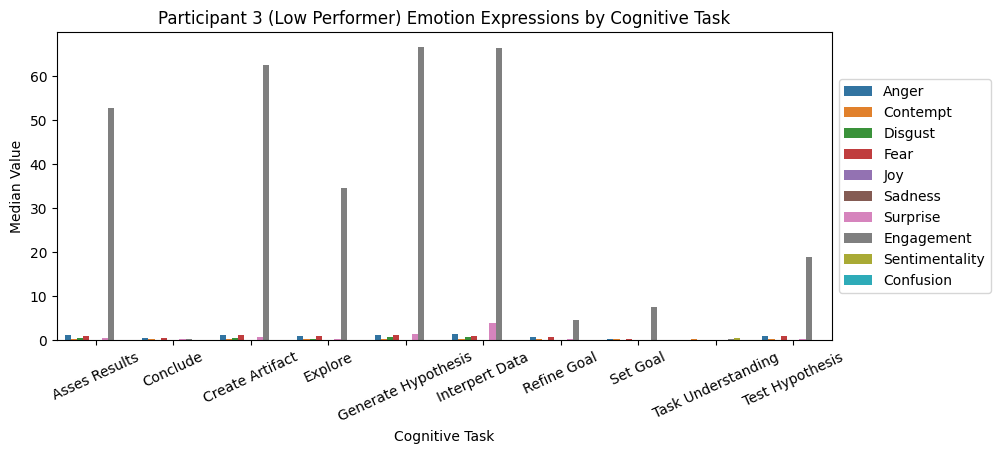

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# medians_to_plot = medians.drop(['Engagement', 'Cognitive Task Encoded'], axis=1)

# Melt the dataframe to convert emotions into a column
melted_df = medians.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Median Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Median Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Participant 3 (Low Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Median Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()


<h3>Mean</h3>

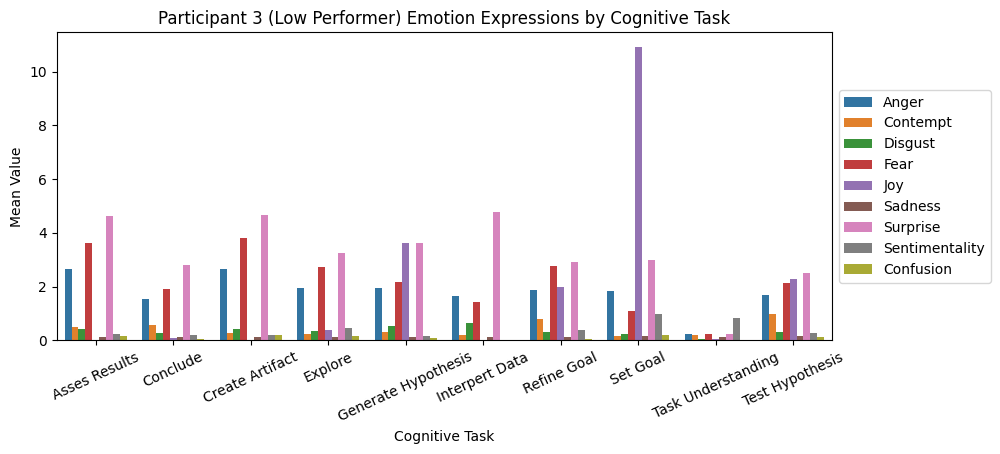

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create means df
means = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Sentimentality', 'Confusion']].groupby(final_df['Cognitive Task']).mean()
# Reset index and add 'Cognitive Task' as a column
means = means.reset_index()
means['Cognitive Task'] = means['Cognitive Task']

# Melt the dataframe to convert emotions into a column
melted_df = means.melt(id_vars='Cognitive Task', var_name='Emotion', value_name='Mean Value')

# Create the bar plot using seaborn
plt.figure(figsize=(10, 4))
sns.barplot(x='Cognitive Task', y='Mean Value', hue='Emotion', data=melted_df)

# Set the title and axes labels
plt.title('Participant 3 (Low Performer) Emotion Expressions by Cognitive Task')
plt.xlabel('Cognitive Task')
plt.ylabel('Mean Value')

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=25)

# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()

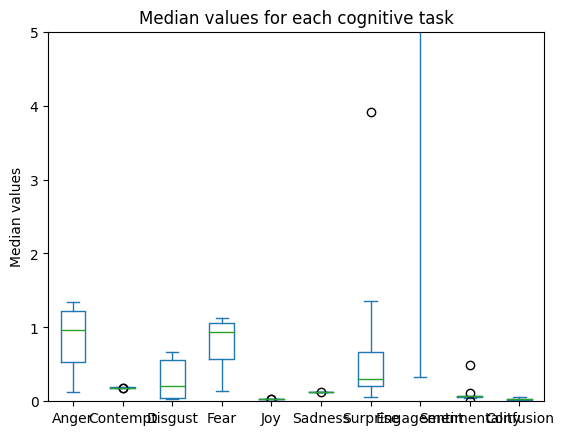

In [11]:
import matplotlib.pyplot as plt


# create a box plot of the medians
medians.plot(kind='box')

plt.ylim(0, 5)

# set the plot title and axis labels
plt.title('Median values for each cognitive task')
plt.ylabel('Median values')

# display the plot
plt.show()

In [12]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Print the column names in the dataframe
print(medians.columns)

# Encode 'Cognitive Task' column into numerical values
le = LabelEncoder()
medians['Cognitive Task Encoded'] = le.fit_transform(medians['Cognitive Task'])



Index(['Cognitive Task', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy',
       'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion'],
      dtype='object')


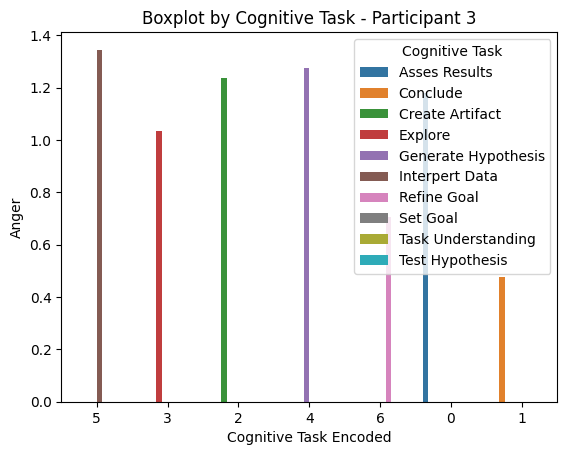

In [13]:
import matplotlib.pyplot as plt

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Participant 3")

# Display the plot
plt.show()


In [14]:
# Create medians df
general_medians = final_df[['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Sentimentality', 'Confusion']].median()
general_medians.head(20)


Anger              0.998678
Contempt           0.186814
Disgust            0.238133
Fear               0.947007
Joy                0.024843
Sadness            0.126304
Surprise           0.311725
Engagement        28.883924
Sentimentality     0.081228
Confusion          0.030473
dtype: float64

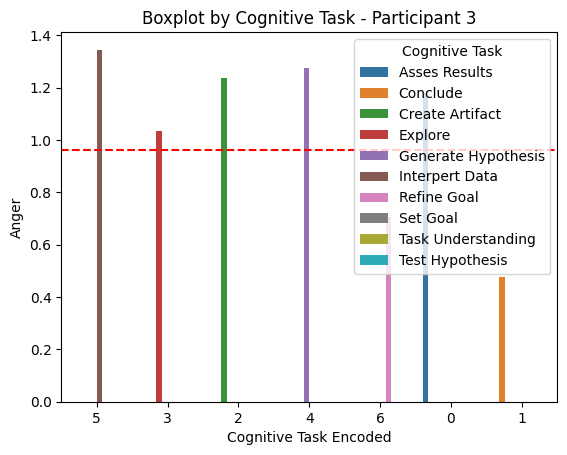

In [15]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task', order=[5,3,2,4,6,0,1])

# Add the title
plt.title("Boxplot by Cognitive Task - Participant 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Get the original string labels from the LabelEncoder
le = LabelEncoder()
le.fit(medians['Cognitive Task'])
labels = le.inverse_transform([5,3,2,4,6,0,1])  


# Display the plot
plt.show()


Wrong Lables below!!!

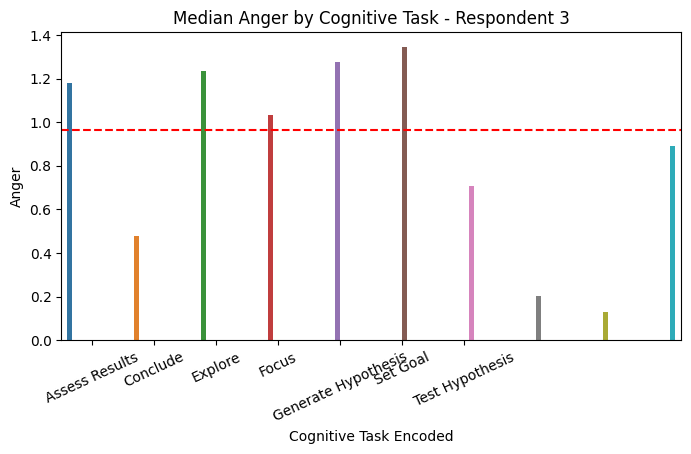

In [16]:
import matplotlib.pyplot as plt

# Define a dictionary to map encoded labels to their corresponding original labels
label_map = {0: 'Assess Results', 1: 'Conclude', 2: 'Explore', 3: 'Focus', 4: 'Generate Hypothesis', 5: 'Set Goal', 6: 'Test Hypothesis'}

# Calculate the general median values
general_median = medians['Anger'].median()

# Create the plot with a wider figure size
fig, ax = plt.subplots(figsize=(8,4))

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Anger', data=medians, hue='Cognitive Task')

# Add the title
plt.title("Median Anger by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Define the desired order of the labels as a list
ordered_labels = [label_map[i] for i in [0,1,2,3,4,5,6]] # [5,3,2,4,6,0,1]]

# Set the x-axis tick labels using the ordered_labels list
plt.xticks(range(len(label_map)), ordered_labels, rotation=25, fontsize=10)

plt.legend().remove()
# Display the plot
plt.show()


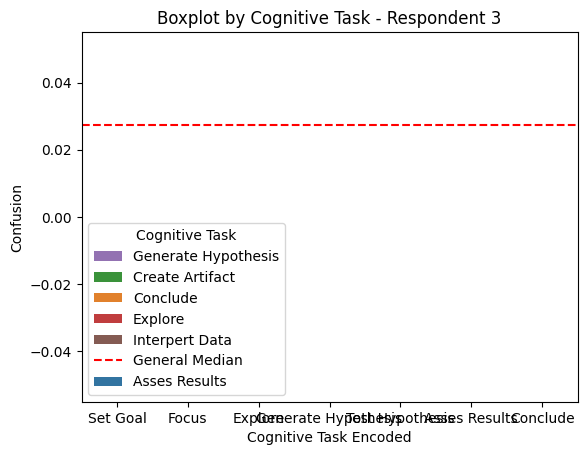

In [17]:
import matplotlib.pyplot as plt

# Calculate the general median values
general_median = medians['Confusion'].median()

# Create the plot
sns.barplot(x='Cognitive Task Encoded', y='Confusion', data=medians, hue='Cognitive Task', order=['Set Goal','Focus', 'Explore', 'Generate Hypothesis', 'Test Hypothesis', 'Asses Results', 'Conclude'])

# Add the title
plt.title("Boxplot by Cognitive Task - Respondent 3")

# Add the horizontal line for general median values
plt.axhline(y=general_median, color='red', linestyle='--', label='General Median')

# Reorder the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,3,2,4,6,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title='Cognitive Task')

# Display the plot
plt.show()


In [18]:
cognitive_df = final_df['Cognitive Task']
cognitive_df.replace('nan', pd.NA, inplace=True)

cognitive_df.dropna
cognitive_df.head

<bound method NDFrame.head of 1         Task Understanding
3         Task Understanding
4         Task Understanding
5         Task Understanding
6         Task Understanding
                 ...        
146223                   NaN
146225                   NaN
146227                   NaN
146229                   NaN
146231                   NaN
Name: Cognitive Task, Length: 73119, dtype: object>

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# df_phases = pd.read_csv(cognitive_phase_data)
df_phases = pd.DataFrame(final_df['Cognitive Task'], columns=['Cognitive Task'])

# Convert the Cognitive Task column to a string type
df_phases['Cognitive Task'] = df_phases['Cognitive Task'].astype(str)

df_phases.replace('nan', pd.NA, inplace=True)
# df_phases['Cognitive Task'] = df_phases['Cognitive Task'].replace("<NA>", float('nan'))


# df_cleaned = df_phases.dropna()

df_cleaned = df_phases.dropna(subset=['Cognitive Task'], how='any').copy()



df_cleaned.head()




,Cognitive Task
1,Task Understanding
3,Task Understanding
4,Task Understanding
5,Task Understanding
6,Task Understanding


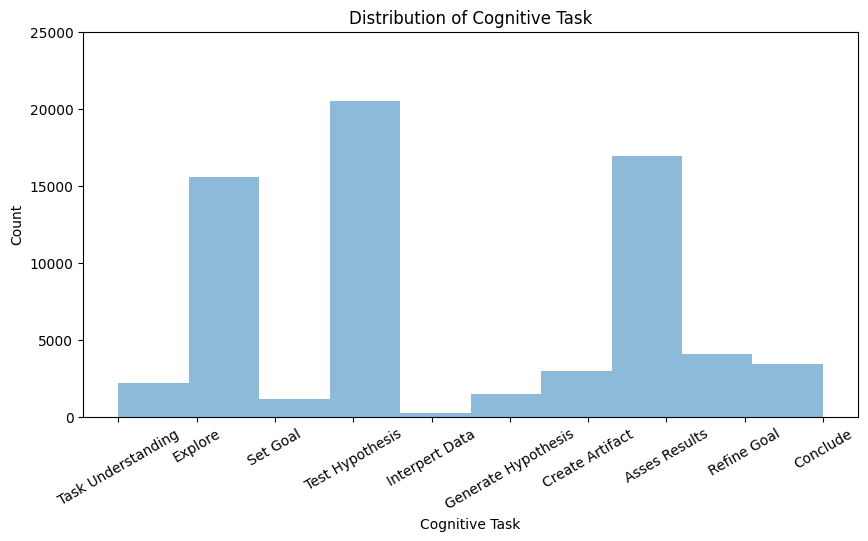

In [26]:
# Create a wider figure
fig, ax = plt.subplots(figsize=(10, 5))

# Create a histogram of the Cognitive Task column
plt.hist(df_cleaned['Cognitive Task'], alpha=0.5)
plt.ylim(0, 25000) 

# Add labels and title
plt.xlabel('Cognitive Task')
plt.ylabel('Count')
plt.title('Distribution of Cognitive Task')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=30)
# Show the plot
plt.show()